## Практическое задание №1. Реализация линейной регрессии с градиентным спуском

Задача — на основе данных X и Y тренировать модель, то есть найти оптимальные веса и смещение, минимизируя ошибку. Важно, что обычно для этого используется метод градиентного спуска.

На каждой итерации обновляем веса и смещение. Важно, чтобы метод также инициализировал веса (если это необходимо) перед обучением.

Вам предстоит реализовать класс LinearRegression, который будет обучать модель линейной регрессии с помощью градиентного спуска и делать предсказания.

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [27]:
class LinearRegression() :
    # конструктор
    def __init__(self, learning_rate, iterations):
        # внутренние переменные
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    # метод для обучения
    def fit(self, X, y) :
        self.bias = np.zeros(X.shape[1])
        self.weights = np.random.rand(X.shape[1])
        # градиентный спуск
        for i in range(self.iterations):
            self.update_weights(X, y)

    # метод обновляет коэффициенты (веса и смещение) модели на основе ошибки mse
    def update_weights(self, X, y):
        m = X.shape[0]
        y_pred = self.predict(X)

        self.bias -= self.learning_rate / m * np.sum((y_pred - y))
        self.weights -= self.learning_rate / m * np.sum(np.dot((y_pred - y), X))

    # метод для предсказания значений
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [28]:
# Прочитаем набор данных
df = pd.read_csv( "salary_data.csv" )
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [33]:
# Выделим признаки (YearExpirience) и целевую переменную (Salary)
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

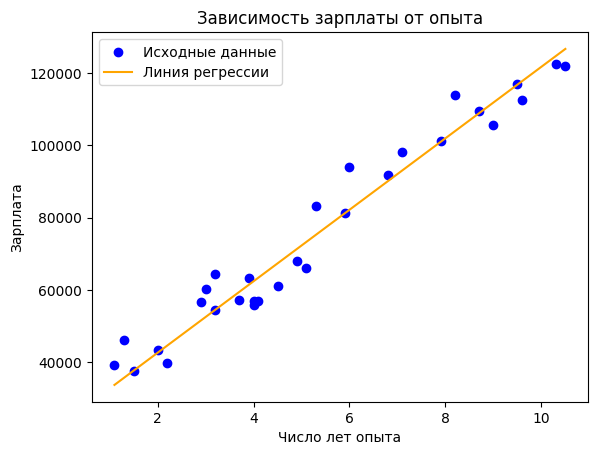

In [34]:
# Обучим модель
model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, y)
# Сделаем предсказание
y_pred = model.predict(X)

plt.scatter(X, y, color = 'blue', label='Исходные данные')
plt.plot(X, y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()

In [39]:
# Полученные веса и смещение
print("model weights:")
print(*np.round(model.weights, 2))
print("\nmodel bias:")
print(np.round(model.bias, 2))

model weights:
9876.11

model bias:
[22920.47]


In [42]:
# Метрики
print(f'MSE: {mean_squared_error(y, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y, y_pred):.2f}')
print(f'R^2: {r2_score(y, y_pred):.2f}')

MSE: 33053761.84
MAE: 4657.50
R^2: 0.95


Значение метрики $R^2$= 0.95, то есть модель объясняет практически 95% изменчивости целевой переменной, то есть существует линейная функциональная зависимость между признаком (YearsExpirience) и таргетом (Salary). Значение $R^2$ близко к 1, что должно говорить о хорошем качестве модели.

Однако значения MAE и MSE достаточно большие. Это может быть связано с тем, что зависимость зарплаты от опыта работы не строго линейная, а так же в наборе данных могут присутствовать выбросы.